# TTT4185 Machine learning for Speech technology

## Student: Francesco Forestieri 105104

## Computer assigment 1: Speech analysis

This assignment assumes that the student has knowledge about short-time spectral estimation, linear prediction modeling and cepstral analysis. You should also know the concept of fundamental frequencies and formants.

Useful plotting commands from `matplotlib.pyplot`: `figure`, `plot`, `subplots`, `pcolormesh`

### **Added by me! It is just a button to play the sound `stry`**

In [23]:
from IPython.display import Audio, display, HTML

audio_file_path = 'stry.wav'

audio_widget = Audio(filename=audio_file_path, autoplay=False)
play_button = HTML(
    '<button onclick="var audio = document.getElementById(\'audio\'); audio.paused ? audio.play() : audio.pause();">'
    'Play/Pause</button>'
)

display(audio_widget, play_button)

### Problem 1

In this problem we will look at a speech signal and do simple spectral analysis on the signal.

(a) Download the speech file `stry.wav` from Blackboard and load the file using `scipy.io.wavefile.read`. The speech represents the latter half of the English word "tapestry". The phonetic transcription is /s/ /t/ /r/ /iy/.
- Plot the signal.
- What is characteristic about the sounds /s/, /t/, /r/ and /iy/?
- Take a 40 millisecond subset of the vowel /iy/ and plot it.
- Find the fundamental frequency $f_0$ of the vowel.

### **(a1) Plot the signal**

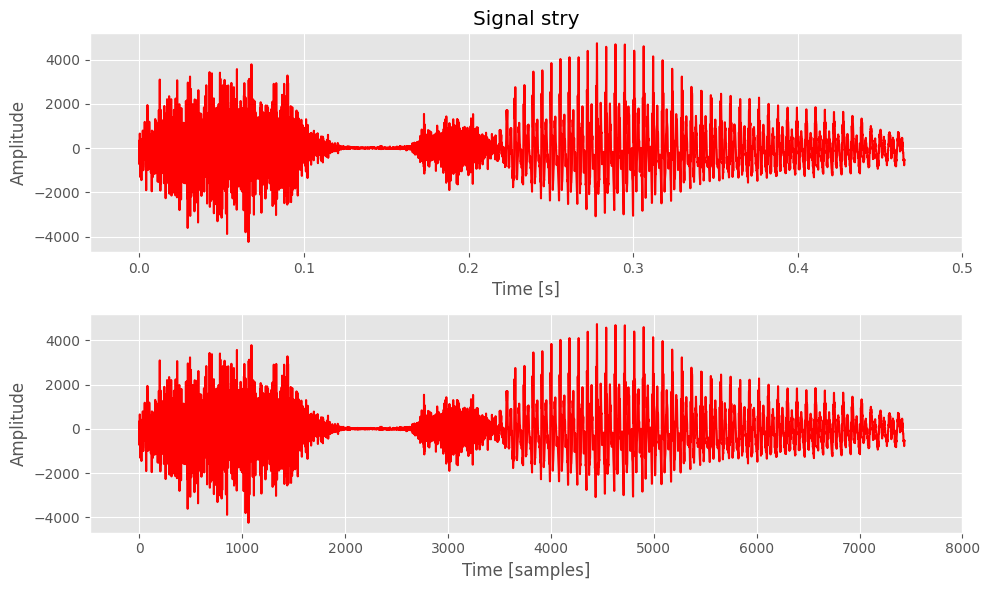

In [24]:
# Import libraries and data

import scipy.io.wavfile
import matplotlib.pyplot as plt
import numpy as np
import pysptk
%matplotlib inline

sampling_rate, data = scipy.io.wavfile.read('stry.wav')

# Plot the signal

# Time axis
time = np.linspace(0, len(data)-1, len(data))/sampling_rate

# Plot settings

plt.style.use("ggplot")

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time, data, color="red")
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.xlim(-0.03, 0.5)
plt.title('Signal stry')

time = np.linspace(0, len(data)-1, len(data))
plt.subplot(2, 1, 2)
plt.plot(time, data, color="red")
plt.xlabel('Time [samples]')
plt.ylabel('Amplitude')
plt.xlim(-0.03*sampling_rate, 0.5*sampling_rate)
plt.tight_layout()

plt.savefig('Plot_stry.pdf')

### **(a2) What is characteristic about the sounds /s/, /t/, /r/ and /iy/?**

Based on the lectures, here are some key characteristics of sounds like /s/, /t/, /r/, and /iy/ in the context of their waveforms and frequency spectra:

1. **Waveform in Time Domain**: The sounds /s/, /t/, /r/, and /iy/ exhibit distinctive waveforms in the time domain. These differences are due to variations in how these sounds are generated within the vocal tract. For example, /s/ is produced with a closed mouth, /t/ involves a sudden stoppage of airflow, /r/ is characterized by resonance in the back of the vocal tract, and /iy/ is a high front vowel. These variations in articulation result in unique temporal patterns in the sound waveforms.

2. **Frequency Spectrum Variations**: The frequency spectra of these sounds differ not only in terms of pitch but also in the distribution of spectral energy. Depending on the articulatory features, you would observe variations in the spectrum. For instance, /s/ exhibits a strong high-frequency component due to the hissing sound it produces, while /iy/ shows a concentration of energy in the higher frequencies associated with its high front vowel quality.

3. **Formants**: In the frequency spectra of these sounds, you would notice distinct peaks or regions of concentrated energy. These peaks are known as formants. Formants represent resonance frequencies in the vocal tract and are characteristic of specific vowel and consonant sounds. Different articulations and vocal tract shapes lead to different formant patterns, which are crucial for speech recognition and perception.

In summary, the differences in the shape of sound waveforms and the frequency spectra of sounds like /s/, /t/, /r/, and /iy/ are due to variations in articulation, glottis activity (pitch), and vocal tract.

### **(a3) Take a 40 milliseconds subset of the vowel /iy/ and plot it.**

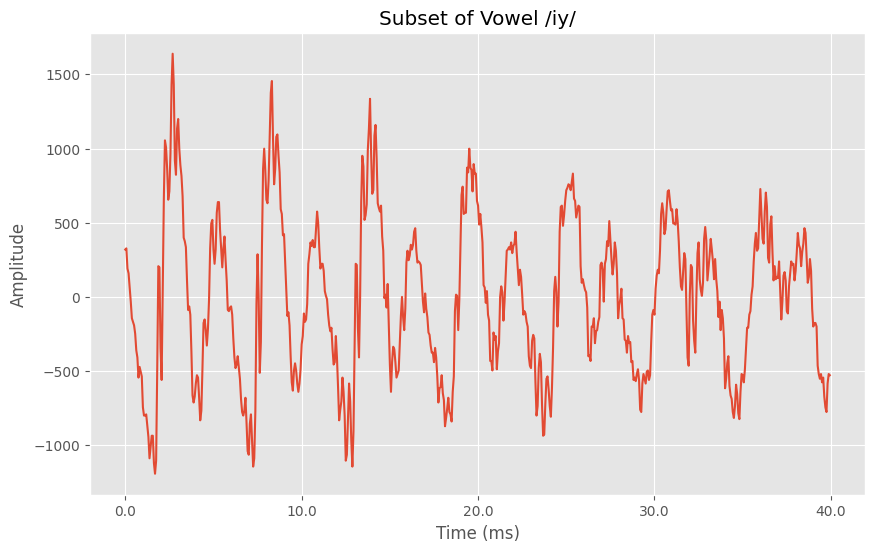

In [25]:
# Setting parameters

# I suppose that the /iy/ sound is at he end of the signal, so I choose the last samples
time_window = 0.040                             # 40 millisecons 
datapoints = int(time_window * sampling_rate)   # Number of datapoints in 40 ms = 640
end_sample = len(data)                          # Number of samples = 7438
start_sample = end_sample - datapoints          # Starting sample = 6798

'''
It is just another way to define the starting point of the range

time_window = 0.040                             # 40 millisecons 
start_sample = 5000                             # I choose 5000 because on the plot before around that value it starts the sound /iy/ 
datapoints = int(time_window * sampling_rate)
end_sample = start_sample + datapoints
'''

# Extract the subset
vowel = data[start_sample : end_sample]

# Plot the subset
plt.figure(figsize=(10, 6))
plt.plot(vowel)
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('Subset of Vowel /iy/')
plt.xticks(np.linspace(0, int(sampling_rate*time_window), 5), np.linspace(0, 40, 5))

plt.show()


### **(a4) Find the fundamental frequency $f_0$ of the vowel.**

Estimated F0 of /iy/: 177.78 Hz


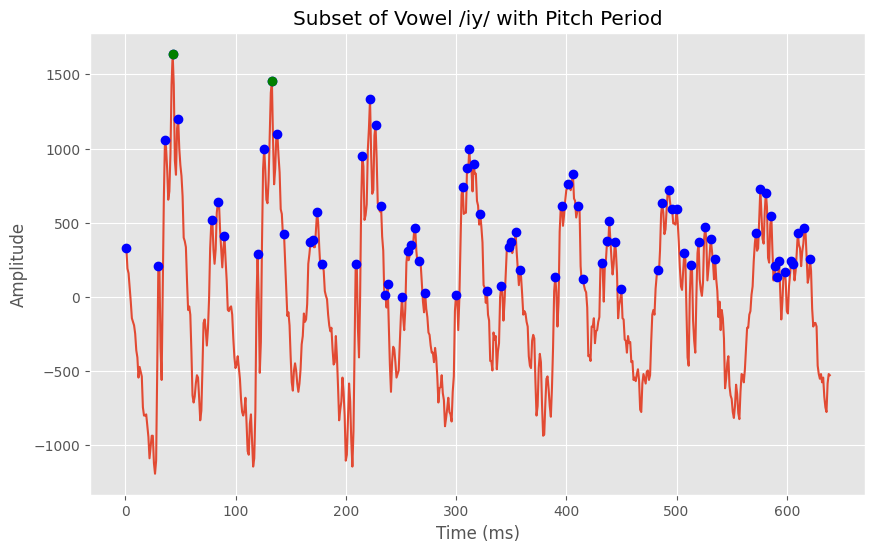

In [26]:
from scipy.signal import find_peaks

time = np.linspace(0, len(vowel)-1, len(vowel))/sampling_rate
peaks1, _ = find_peaks(vowel, height=0)
peaks2, _ = find_peaks(vowel, height=1400)

# Compute the average pitch period (in samples)
pitch_period_samples = np.mean(np.diff(peaks2))

# Compute the fundamental frequency (F0) in Hz
f0 = sampling_rate / pitch_period_samples

# Plot the subset signal and detected pitch period
plt.figure(figsize=(10, 6))
plt.plot(vowel)
plt.plot(peaks1, vowel[peaks1], 'bo')
plt.plot(peaks2, vowel[peaks2], 'go')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('Subset of Vowel /iy/ with Pitch Period')
#plt.xticks(np.linspace(0, int(sampling_rate*time_window), 10), np.linspace(0, 40, 10))

print(f'Estimated F0 of /iy/: {np.round(f0, 2)} Hz')

I have computetd the fundamental frequency of the vowel sound /iy/ with the following formula:

$$
f_0 = \frac{f_{sampling}}{\Delta t_{sample}}  = \frac{16.000 Hz}{(133 - 43) samples} = \frac{16.000}{90} = 177.78 Hz
$$

I have considered only the two peaks in green.

(b) Spectral analysis
- Estimate the spectrum of the vowel using an FFT of length 1024. Plot the spectrum expressed in dBs ($20 \log_{10}(x)$) as a function of frequency.
- Multiply the signal by a Hamming window and repeat the last operation.
- Explain the difference between the two spectra.
- Estimate the fundamental frequency $f_0$ using the spectrum, and compare the result to what you got in 1a)
- Roughly estimate the two first formant frequencies.

Useful Python functions: `numpy.fft.fft`, `numpy.abs`, `scipy.signal.hamming`.

### **(b1) Estimate the spectrum of the vowel using an FFT of length 1024. Plot the spectrum expressed in dBs (`20log10(x)`) as a function of frequency.**

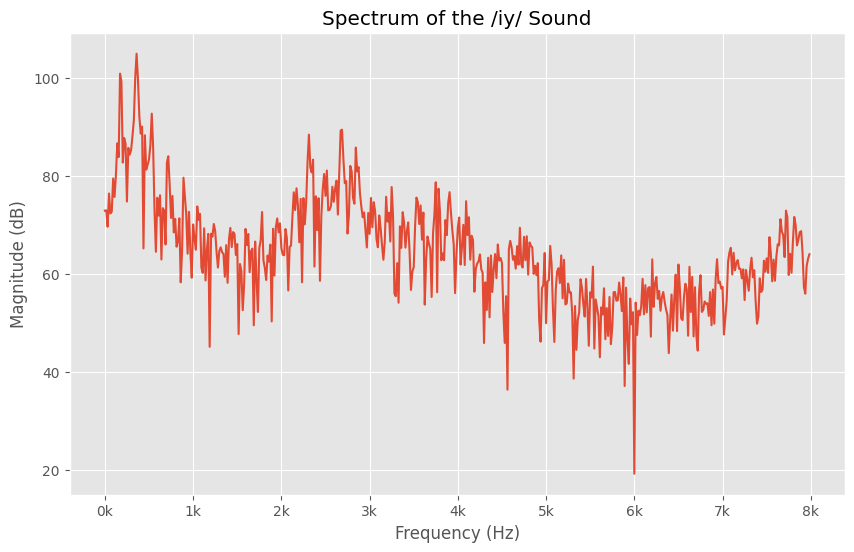

In [27]:
# Perform FFT on the vowel signal
fft_length = 1024
spectrum = np.fft.fft(vowel, fft_length)
# Calculate the corresponding frequencies
frequencies = np.fft.fftfreq(fft_length, 1 / sampling_rate)
# Take the absolute value of the spectrum to get magnitude
magnitude = np.abs(spectrum)
# Convert magnitude to dB scale
magnitude_db = 20 * np.log10(magnitude)

# Plot the spectrum in dB
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:fft_length // 2], magnitude_db[:fft_length // 2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.xticks([   0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000],
           ["0k", "1k", "2k", "3k", "4k", "5k", "6k", "7k", "8k"])
plt.title('Spectrum of the /iy/ Sound')
plt.grid(True)
plt.show()

### **(b2) Multiply the signal by a Hamming window and repeat the last operation.**

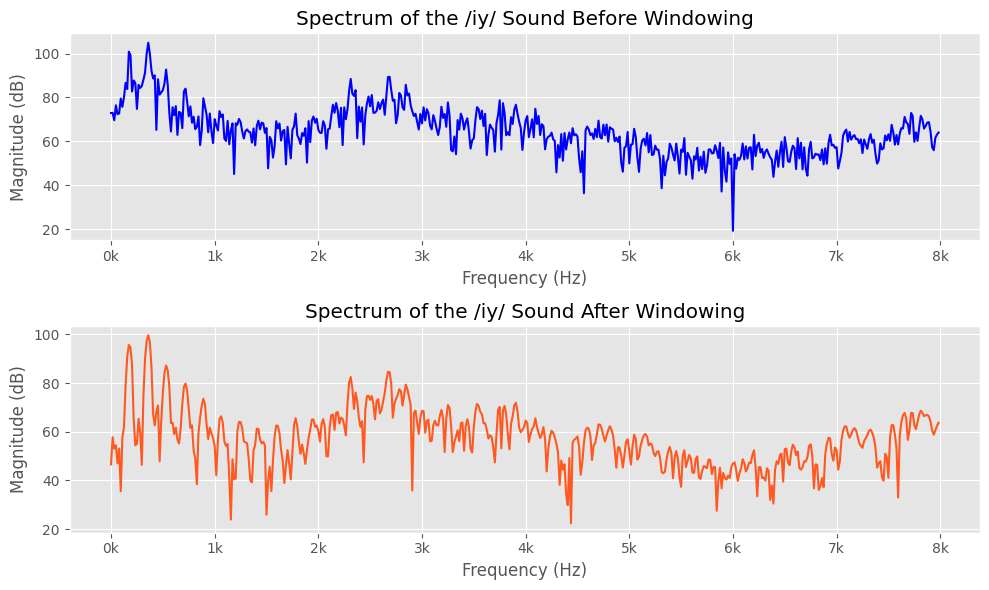

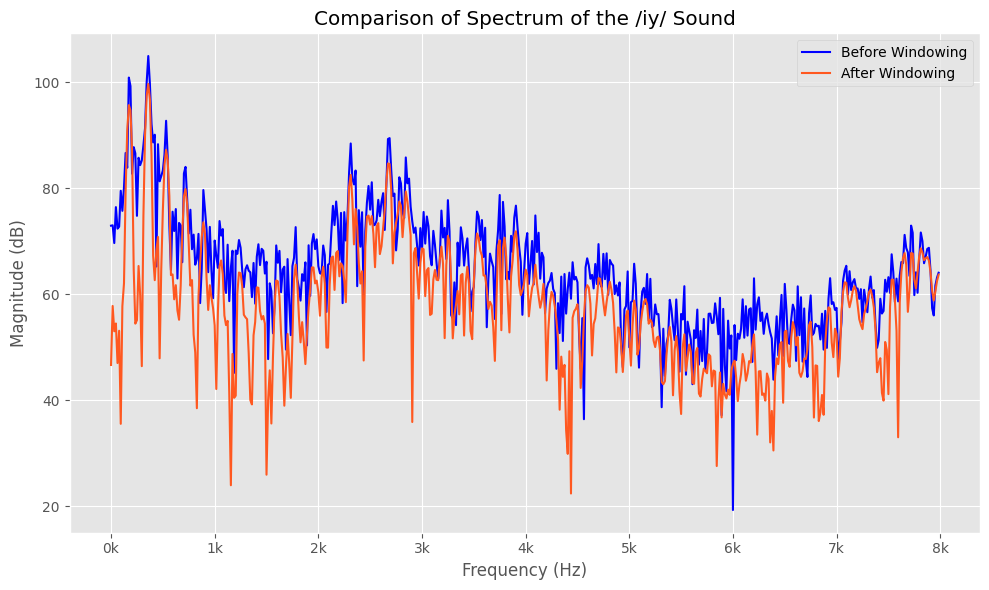

In [28]:
# The first part is just a copy of the script before to do the comparison of the two signals

# Perform FFT on the vowel signal
fft_length = 1024
spectrum1 = np.fft.fft(vowel, fft_length)
# Calculate the corresponding frequencies
frequencies = np.fft.fftfreq(fft_length, 1 / sampling_rate)
# Take the absolute value of the spectrum to get magnitude
magnitude1 = np.abs(spectrum1)
# Convert magnitude to dB scale
magnitude_db1 = 20 * np.log10(magnitude1)

# Plot the spectrum in dB
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(frequencies[:fft_length // 2], magnitude_db1[:fft_length // 2], color="blue")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.xticks([   0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000],
           ["0k", "1k", "2k", "3k", "4k", "5k", "6k", "7k", "8k"])
plt.title('Spectrum of the /iy/ Sound Before Windowing')
plt.grid(True)



# Generate a Hamming window with the same lenght of the signal
hamming_window = np.hamming(len(vowel))

# Multiply the signal for the Hamming window
vowel_windowed = vowel * hamming_window


# Perform FFT on the vowel signal
fft_length = 1024
spectrum2 = np.fft.fft(vowel_windowed, fft_length)
# Calculate the corresponding frequencies
frequencies = np.fft.fftfreq(fft_length, 1 / sampling_rate)
# Take the absolute value of the spectrum to get magnitude
magnitude2 = np.abs(spectrum2)
# Convert magnitude to dB scale
magnitude_db2 = 20 * np.log10(magnitude2)

# Plot the spectrum in dB
plt.subplot(2, 1, 2)
plt.plot(frequencies[:fft_length // 2], magnitude_db2[:fft_length // 2], color="#ff5820")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.xticks([   0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000],
           ["0k", "1k", "2k", "3k", "4k", "5k", "6k", "7k", "8k"])
plt.title('Spectrum of the /iy/ Sound After Windowing')
plt.grid(True)
plt.tight_layout()

plt.savefig('Plot spectrum vowel before and after windowing.pdf')

# Plot togheter
plt.figure(figsize=(10, 6))
plt.plot(frequencies[:fft_length // 2], magnitude_db1[:fft_length // 2], color="blue")
plt.plot(frequencies[:fft_length // 2], magnitude_db2[:fft_length // 2], color="#ff5820")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')

plt.title('Comparison of Spectrum of the /iy/ Sound')
plt.xticks([   0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000],
           ["0k", "1k", "2k", "3k", "4k", "5k", "6k", "7k", "8k"])
plt.legend(["Before Windowing", "After Windowing"])
plt.tight_layout()

plt.savefig('Plot of the comparison of spectrum vowel before and after windowing.pdf')

### **(b3) Explain the difference between the two spectra.**

The distinction between the spectrum without a window (blue) and the spectrum with a Hamming window (orange) arises from the utilization of the Hamming window on the signal before conducting a Fast Fourier Transform (FFT). Applying specific windows, like the Hamming window, serves to mitigate or prevent the adverse effects of spectral leakage.

In this context, the primary effect of windowing is the reduction or suppression of high-frequency components introduced by spectral leakage. This leads to more accurate amplitude representations in the frequency domain.

The consequence of reduced resolution might not be readily apparent in the provided plot but is a crucial consideration when analyzing signals in the frequency domain. Windowing strikes a balance between mitigating spectral leakage and maintaining frequency accuracy, a trade-off that's particularly relevant in various signal processing applications.

### **(b4) Estimate the fundamental frequency $f_0$ using the spectrum, and compare the result to what you got in 1a)**

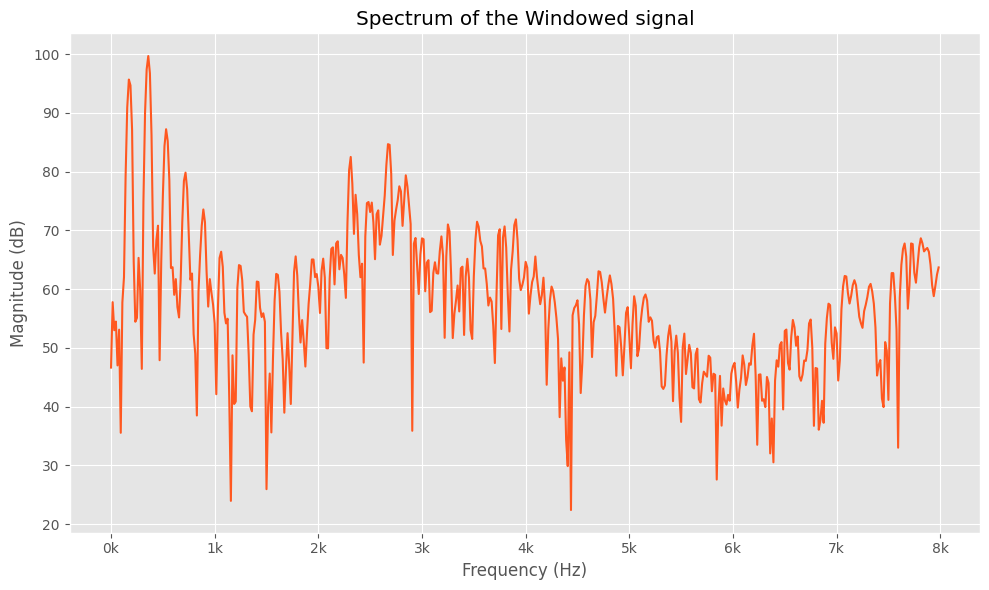

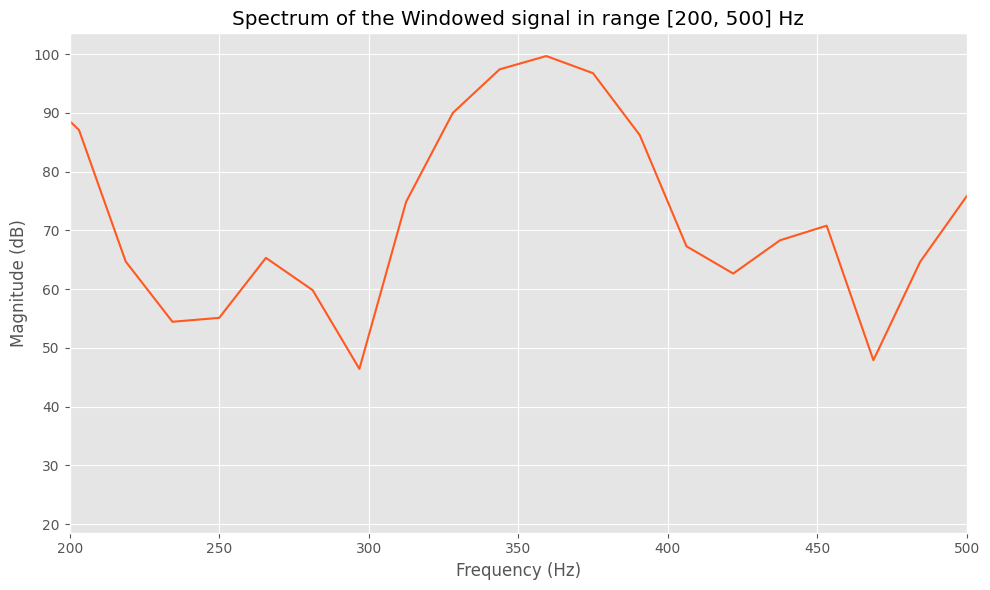

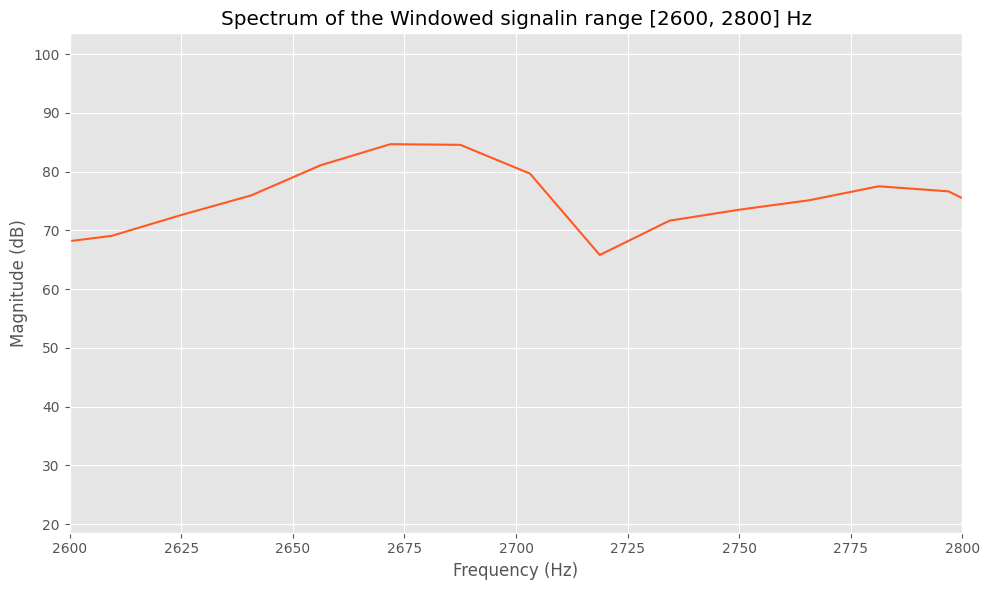

In [29]:
# I plotted again the spectrum just to see better the first peaks

plt.figure(figsize=(10, 6))
plt.plot(frequencies[:fft_length // 2], magnitude_db2[:fft_length // 2], color="#ff5820")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')

plt.title('Spectrum of the Windowed signal')
plt.xticks([   0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000],
           ["0k", "1k", "2k", "3k", "4k", "5k", "6k", "7k", "8k"])

plt.tight_layout()

plt.figure(figsize=(10, 6))
plt.plot(frequencies[:fft_length // 2], magnitude_db2[:fft_length // 2], color="#ff5820")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title('Spectrum of the Windowed signal in range [200, 500] Hz')
plt.xlim(200, 500)

plt.tight_layout()

plt.figure(figsize=(10, 6))
plt.plot(frequencies[:fft_length // 2], magnitude_db2[:fft_length // 2], color="#ff5820")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title('Spectrum of the Windowed signalin range [2600, 2800] Hz')
plt.xlim(2600, 2800)

plt.tight_layout()

Looking the spectrum of the windowed signal, we can see that the fundamental frequency corresponds to the first peak of the spectrum, so

$$f_0 = 180 Hz$$

We can see that the $f_0$ computed now is similar to the one compute in point 1a).

### **(b5) Roughly estimate the two first formant frequencies.**

As we can see from the plot of the spectrum of the windowed signal the first two formants are roughly in:

$$F_1 = 360 Hz \space\space\space\space F_2 = 2675 Hz$$

(c) AR modeling
- Compute the coefficients of an AR model (linear prediction coefficients) with order 4, 8, 16 and 50, based on the vowel.
- Estimate the spectrum for each of the model orders. Plot the spectrum in dBs as a function of frequency.
- Compare your results with the spectrum from 1b). Which model order yields the "best" spectral envelope? What happens if the model order is too high or too low?
- Why is it not possible to estimate the fundamental frequency based on the LP model?

Useful Python functions: `pysptk.sptk.lpc`, `scipy.signal.freqz`. Check the documentation of the sptk package https://netix.dl.sourceforge.net/project/sp-tk to know which parameters are returned by the `lpc` function, and what model they correspond to.

### **(c1) Compute the coefficients of an AR model (linear prediction coefficients) with order 4, 8, 16 and 50, based on the vowel.**
### **(c2) Estimate the spectrum for each of the model orders. Plot the spectrum in dBs as a function of frequency.**

LPC Coefficients with oder 4: 
[ 1.26190487 -0.3247781  -0.44259829  0.4768841 ] 

LPC Coefficients with oder 8: 
[ 1.25668793 -0.40746725 -0.48944173  1.2349141  -0.72194652  0.23833733
  0.25247577 -0.46203121] 

LPC Coefficients with oder 16: 
[ 1.19379953 -0.41169952 -0.48730462  1.35106355 -0.7982026   0.46633649
  0.29318503 -0.77561347  0.42419918 -0.3760026  -0.29254437  0.44435595
 -0.30544712 -0.01127851  0.24960259 -0.02858805] 

LPC Coefficients with oder 50: 
[ 1.15384768 -0.37761845 -0.43388873  1.28204281 -0.73612579  0.46022165
  0.17667474 -0.69625912  0.35173925 -0.43780575 -0.23333259  0.42402622
 -0.23757956  0.06145837  0.208369    0.03632686  0.01636543 -0.02422375
 -0.09393628  0.09405458 -0.09330743 -0.10512712  0.2095518  -0.15677317
  0.00454416 -0.03772681  0.13248786 -0.09784603  0.03709981 -0.01702476
  0.0393219  -0.04309807 -0.10836078  0.29299    -0.21295944  0.04538638
  0.13295672 -0.23056899  0.11241034 -0.06810097 -0.05036665  0.09088069
 -0.07323162

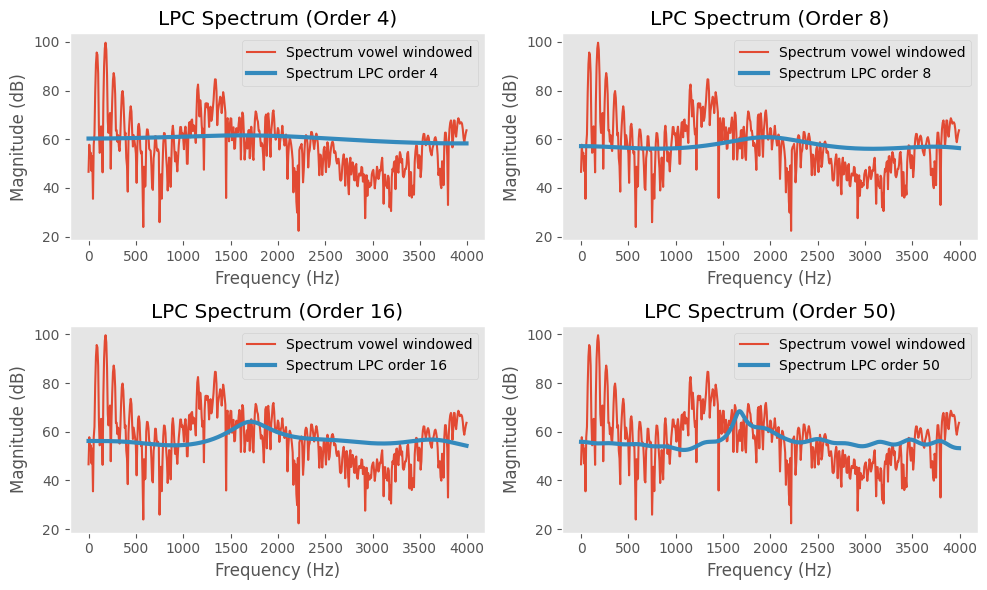

In [30]:
from scipy.signal import lfilter
from scipy.signal import freqz
from pysptk import lpc

# Choose the orders for LPC analysis
orders = [4, 8, 16, 50]

# Initialize a figure to display the LPC spectra
plt.figure(figsize=(10, 6))

# Loop through different orders and compute LPC coefficients
for order in orders:
    # Compute LPC coefficients
    lpc_coeffs = lpc(vowel_windowed, order)
    K = lpc_coeffs[0]
    lpc_coeffs = -lpc_coeffs
    lpc_coeffs[0] = 1
    np.set_printoptions(suppress=True)
    np.round(lpc_coeffs, 2)
    
    print(f"LPC Coefficients with oder {order}: \n{lpc_coeffs[1:]} \n")
    
    # Compute the frequency response of the LPC filter
    w, h = freqz(K, lpc_coeffs, worN=fft_length, fs=sampling_rate)

    # Plot the LPC spectrum
    plt.subplot(2, 2, orders.index(order) + 1)
    plt.plot(w[:fft_length//2], magnitude_db2[:fft_length//2])
    plt.plot(w[:fft_length//2], 20 * np.log10(np.abs(h[:fft_length//2])), linewidth=(3.0))
    plt.title(f'LPC Spectrum (Order {order})')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.legend(["Spectrum vowel windowed", f"Spectrum LPC order {order}"], loc='upper right')
    plt.grid()
    

plt.tight_layout()


plt.savefig('Plot Spectrum LPC Coefficients.pdf')

### **(c3) Compare your results with the spectrum from 1b). Which model order yields the "best" spectral envelope? What happens if the model order is too high or too low?**

If the order of the model is too high we are in overfitting.

We are fitting also the noise and of course we are not interested in.

### **(c4) Why is it not possible to estimate the fundamental frequency based on the LP model?**

Estimating the fundamental frequency $f_0$ directly from a LP model can be challenging because:

- **Linearity Assumption**: The LP model assumes that the signal is a linear combination of past samples. While this assumption is reasonable for many speech signals, it may not hold for all types of signals, especially complex or non-stationary ones.

- **Model Order Selection**: LP models require selecting an appropriate model order (the number of coefficients) in advance. Choosing the correct model order can be challenging and can significantly affect the accuracy of $f_0$ estimation. As we can see from the previous plot, changing the order change also the $f_0$.

- **Non-stationarity**: Speech signals are often non-stationary, meaning that their statistical properties change over time. The LP model assumes stationarity, which can limit its accuracy in modeling F0 variations.

(d) Use `scipy.signal.spectrogram` to create a spectrogram of the entire speech signal. Try to generate both wide- and narrow-band spectrograms by adjusting the window lengths and overlaps. Which characteristic traits of the speech sounds /s/, /t/, /r/ and /iy/ can you see from the spectrogram?

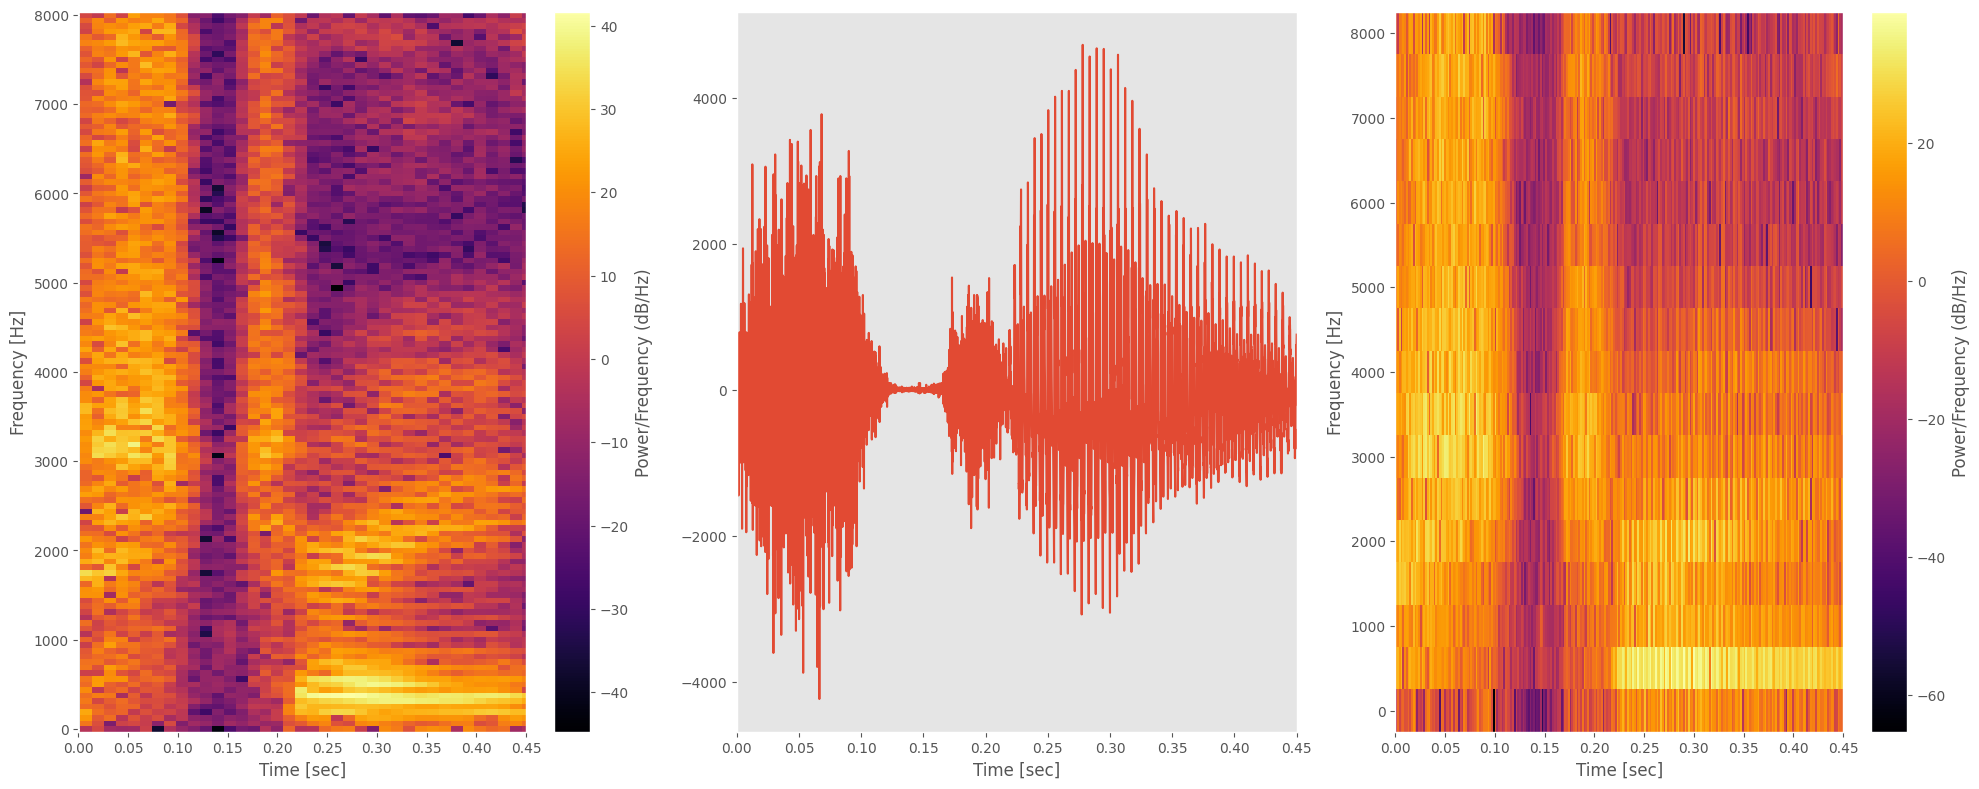

In [31]:
from scipy.signal import spectrogram

# Create a figure
plt.figure(figsize=(20, 8))

# First plot - Signal in time domain
plt.subplot(1,3,2)
time = np.linspace(0,len(data),len(data)) * 1/sampling_rate
plt.plot(time,data)
plt.xlim(0,0.45)
plt.xlabel('Time [sec]')
plt.grid()

# Second plot - Spectrogram with a 64-sample overlapping for each FFT
plt.subplot(1,3,1)
frequencies_sp, time, Sxx = spectrogram(data, sampling_rate, noverlap=64)
plt.pcolormesh(time, frequencies_sp, 10*np.log10(Sxx), shading='auto', cmap='inferno')
plt.xlim(0,0.45)
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

# Third plot - Spectrogram without overlapping and 32-sample for each FFT
plt.subplot(1,3,3)
frequencies_sp, time, Sxx = spectrogram(data, sampling_rate, nperseg = 32, nfft = 32)
plt.pcolormesh(time, frequencies_sp, 10*np.log10(Sxx), shading='auto', cmap='inferno')
plt.xlim(0,0.45)
plt.ylabel('Frequency [Hz]')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.xlabel('Time [sec]')

plt.tight_layout()

plt.savefig('Plot Spectrogram.pdf')

In the plots presented above, we have the signal represented in the time domain in the middle. To the left and right of the signal, there are corresponding spectrograms:

- The one on the left side is generated with a 64-sample overlapping for each FFT, resulting in a smooth and continuous appearance.
- The one on the right side, however, is produced without any overlapping and uses a relatively small window of 32 samples per FFT, giving it a wideband appearance.

Distinguishing between the phonemes /s/, /t/, /r/, and /yi/ is not a straightforward task, even with the aid of both the time domain signal and the spectrogram.

/s/ and /t/ appear to occur right at the beginning of the signal. They exhibit a complex mixture of frequencies, which makes sense since /t/ sound is like an impulse. Additionally, the short break in between these sounds, noticeable in both the signal and the spectrogram, aligns with where one would pause when pronouncing a /t/.

Following the explanation above, /r/ must be the sound that follows the pause. Similar to /s/, it comprises a combination of various frequencies. Being a consonant, it is rather short-lived and transitions rapidly into the /iy/ vowel.

The final part of the signal represents the /iy/ vowel. Vowels can be articulated at different pitches, and the spectrogram clearly illustrates that the vowel exhibits more discernible prominent frequencies than the other segments of the word. 

### Problem 2
In this problem we look at the cepstrum and deconvolution

(a) Compute and plot the real cepstrum of the vowel from problem 1a).

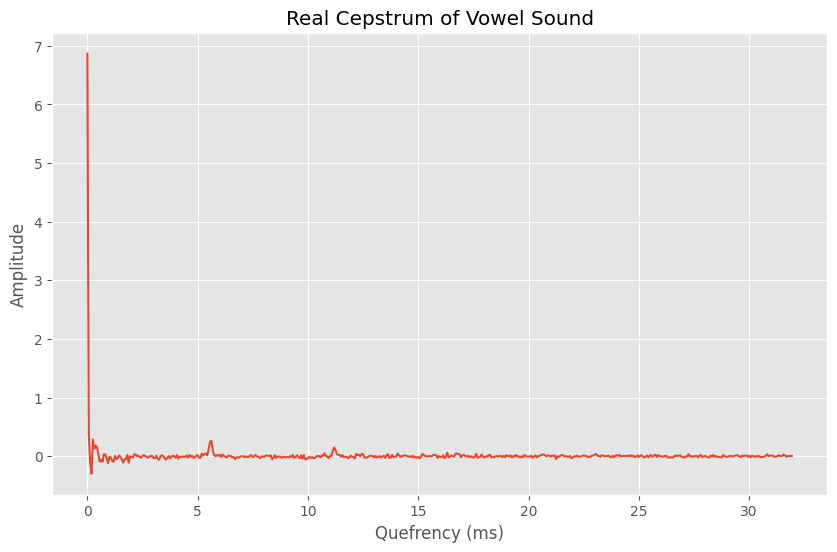

In [32]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy.signal import hamming
from scipy.fft import fft, ifft

datapoints = fft_length                 # Number of datapoints 1024
end_sample = len(data)                  # Number of samples = 7438
start_sample = end_sample - datapoints  # Starting sample = 6798

# Extract the subset
vowel2 = data[start_sample : end_sample]

hamming_window2 = np.hamming(len(vowel2))
vowel_windowed2 = vowel2 * hamming_window2

# Compute the cepstrum of the signal
cepstrum = np.real(ifft(np.log(np.abs(fft(vowel_windowed2)))))
time_cepstrum = np.arange(0, len(cepstrum)) * 1/sampling_rate * 1000
# Plot the real cepstrum
plt.figure(figsize=(10, 6))
plt.plot(time_cepstrum[:fft_length//2], cepstrum[:fft_length//2])
plt.title('Real Cepstrum of Vowel Sound')
plt.xlabel('Quefrency (ms)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()



**(b) Use the cepstrum to compute the fundamental frequency $f_0$. Compare your results with those obtained in problem 1).**



The cepstrum provides valuable insights into the periodicity of spectral information. Specifically, it helps us identify peaks in the cepstrum that correspond to various aspects of the signal's harmonic structure:

- The peak at `0 ms` signifies a periodicity associated with `very high frequencies`.
- The peak around `1 ms` corresponds to a periodicity of approximately `1000 Hz`.
- The peak around `6 ms` represents a periodicity of around `166.67 Hz`.
- The peak around `12 ms` indicates a periodicity of approximately `83.33 Hz`.

In essence, the peaks on the left side of the cepstrum reflect long-term spectral envelope information, while the peaks on the right side capture short-term variations or "noises" in the spectrum.

Our fundamental frequency, denoted as $f_0$, is expected to lie somewhere in between these extremes. It changes more rapidly than the envelope but not as swiftly as the fine-scale "noise"-like components. The presence of the peak at 6 ms aligns with the fundamental frequency of `166.67 Hz`, which is consistent with the findings in the previous section (1a).

In summary, the cepstrum provides a powerful tool for analyzing the periodic characteristics of a signal, helping us understand both its long-term spectral envelope and short-term spectral variations.

(c) In this subproblem you will use the cepstrum to estimate the spectral envelope
- Use liftering to extract the part of the ceptrum that represents the spectral envelope.
- Plot the spectral envelope as a function of frequency, and compare the result with the results from problem 1).

Hint 1: Remember that the cepstrum of a real signal is symmetric, so the liftered signal must be symmetric as well.

Hint 2: The FFT of a real, symmtric signal is real, but due to round-off errors small imaginary noise may occur. Use `np.real` to get to the real part of the liftered log-spectrum.

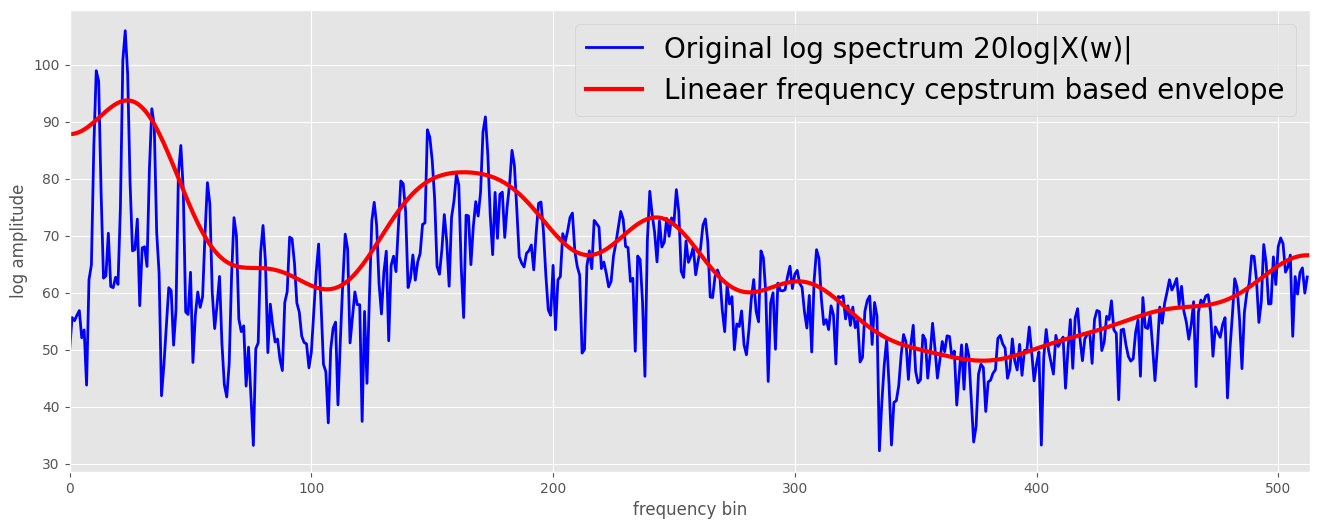

In [33]:
# Maybe it isn't correct in theory, but from the plot seems good.
# I take inspiration one example find in the documentation of pysptk.

%matplotlib inline

import matplotlib
import seaborn
import pysptk
plt.rcParams['figure.figsize'] = (16, 6)

# plotting utility
def pplot(sp, envelope, title="no title"):
    plt.plot(sp, "b-", linewidth=2.0, label="Original log spectrum 20log|X(w)|")
    plt.plot(20.0/np.log(10)*envelope, "r-", linewidth=3.0, label=title)
    plt.xlim(0, len(sp))
    plt.xlabel("frequency bin")
    plt.ylabel("log amplitude")
    plt.legend(prop={'size': 20})

# Compute spectrum 20log|X(w)| for a windowed signal
spectrum = 20*np.log10(np.abs(np.fft.rfft(vowel_windowed2)))


mgc = pysptk.mgcep(vowel_windowed2, 20, 0.0, 0.0)
pplot(spectrum, pysptk.mgc2sp(mgc, 0.0, 0.0, fft_length).real, title="Lineaer frequency cepstrum based envelope")

